In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import sagemaker
import boto3
import matplotlib.pyplot as plt 
pd.set_option('display.max_columns',None) # To display all columns
pd.set_option('display.max_rows',None) # To display all columns
client = boto3.client('s3')
import feather
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
from functools import reduce

In [4]:
#df = pd.read_feather('s3://haseebdata/Dataset/Dataset.ftr')
Ed = pd.read_feather('s3://haseebdata/Dataset/EDNET.ftr')
dfq = pd.read_feather('s3://haseebdata/Dataset/dfq.ftr')
dfu = pd.read_feather('s3://haseebdata/Dataset/Users.ftr')

In [ ]:
df.head()

In [5]:
Ed.head()

,timestamp,solving_id,question_id,user_answer,elapsed_time,user_iD,correct_answer,bundle_id,explanation_id,part,tags,deployed_at,correct
0,1565096190868,1,5012,b,38000,1,c,3544,3544,5,74,2019-09-17 02:43:28.616,0.0
1,1565096221062,2,4706,c,24000,1,c,3238,3238,5,71,2019-10-30 05:34:30.723,1.0
2,1565096293432,3,4366,b,68000,1,b,2898,2898,5,103,2019-10-30 05:37:51.451,1.0
3,1565096339668,4,4829,a,42000,1,c,3361,3361,5,83,2019-06-24 09:24:51.347,0.0
4,1565096401774,5,6528,b,59000,1,d,5060,5060,5,90,2019-10-17 03:03:15.009,0.0


In [6]:
dfu.head()

,user_iD,Total Questions Attempted,Corrected,Incorrected,Percentage,elapsed_time
0,1,1082,753,329,69.593346,36.75
1,10,16,9,7,56.250000,27.75
2,100,33,18,15,54.545455,34.50
3,1000,1488,930,558,62.500000,34.00
4,10000,405,258,147,63.703704,25.00


In [7]:
dfu['Percentage']= dfu['Percentage'].apply(np.ceil)

In [8]:
dfu[0:20]

,user_iD,Total Questions Attempted,Corrected,Incorrected,Percentage,elapsed_time
0,1,1082,753,329,70.0,36.7500
1,10,16,9,7,57.0,27.7500
2,100,33,18,15,55.0,34.5000
3,1000,1488,930,558,63.0,34.0000
4,10000,405,258,147,64.0,25.0000
5,100001,33,15,18,46.0,18.0000
6,100002,250,185,65,74.0,14.0000
7,100003,30,11,19,37.0,15.0000
8,100004,30,17,13,57.0,20.0000
9,100005,3436,2410,1026,71.0,18.6660


<AxesSubplot:>

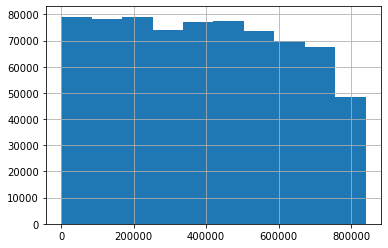

In [9]:
dfu['user_iD'].hist()

<AxesSubplot:ylabel='Frequency'>

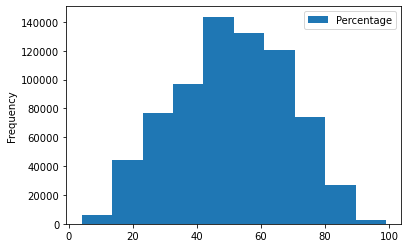

In [10]:
dfu.plot( x='user_iD', y='Percentage', kind='hist')

In [11]:
D2 = dfu.sort_values('user_iD')

In [12]:
D2.head()

,user_iD,Total Questions Attempted,Corrected,Incorrected,Percentage,elapsed_time
0,1,1082,753,329,70.0,36.750
103211,2,1103,765,338,70.0,24.000
205341,3,10,3,7,30.0,38.000
305985,4,2699,1932,767,72.0,27.666
408468,5,1233,754,479,62.0,23.250


In [13]:
D1 = df.sort_values('user_iD')

NameError: name 'df' is not defined

In [29]:
D1.head()

,timestamp,solving_id,question_id,user_answer,elapsed_time,user_iD
0,1565096190868,1,5012,b,38000,1
713,1569366922604,452,243,c,21000,1
714,1569368176508,453,4135,a,1200000,1
715,1569368543137,454,4059,b,218000,1
716,1569392229981,455,9010,d,87000,1


In [14]:
Ed['elapsed_time'] = Ed['elapsed_time'].div(1000)
Ed.head()

,timestamp,solving_id,question_id,user_answer,elapsed_time,user_iD,correct_answer,bundle_id,explanation_id,part,tags,deployed_at,correct
0,1565096190868,1,5012,b,38.0,1,c,3544,3544,5,74,2019-09-17 02:43:28.616,0.0
1,1565096221062,2,4706,c,24.0,1,c,3238,3238,5,71,2019-10-30 05:34:30.723,1.0
2,1565096293432,3,4366,b,68.0,1,b,2898,2898,5,103,2019-10-30 05:37:51.451,1.0
3,1565096339668,4,4829,a,42.0,1,c,3361,3361,5,83,2019-06-24 09:24:51.347,0.0
4,1565096401774,5,6528,b,59.0,1,d,5060,5060,5,90,2019-10-17 03:03:15.009,0.0


In [15]:
D3 = Ed.reindex(['user_iD','question_id','user_answer','correct_answer' , 'correct' , 'elapsed_time' , 'solving_id' , 'explanation_id' , 'bundle_id' , 'part' , 'tags' , 'timestamp' , 'deployed_at'], axis=1)

In [16]:
D3.head()

,user_iD,question_id,user_answer,correct_answer,correct,elapsed_time,solving_id,explanation_id,bundle_id,part,tags,timestamp,deployed_at
0,1,5012,b,c,0.0,38.0,1,3544,3544,5,74,1565096190868,2019-09-17 02:43:28.616
1,1,4706,c,c,1.0,24.0,2,3238,3238,5,71,1565096221062,2019-10-30 05:34:30.723
2,1,4366,b,b,1.0,68.0,3,2898,2898,5,103,1565096293432,2019-10-30 05:37:51.451
3,1,4829,a,c,0.0,42.0,4,3361,3361,5,83,1565096339668,2019-06-24 09:24:51.347
4,1,6528,b,d,0.0,59.0,5,5060,5060,5,90,1565096401774,2019-10-17 03:03:15.009


In [17]:
D3= D3.sort_values("user_iD")

In [18]:
D3.head()

,user_iD,question_id,user_answer,correct_answer,correct,elapsed_time,solving_id,explanation_id,bundle_id,part,tags,timestamp,deployed_at
0,1,5012,b,c,0.0,38.0,1,3544,3544,5,74,1565096190868,2019-09-17 02:43:28.616
713,1,243,c,c,1.0,21.0,452,243,243,2,27;28;29;185;183,1569366922604,2017-12-29 16:09:30.617
714,1,4135,a,b,0.0,1200.0,453,2667,2667,5,77,1569368176508,2019-09-17 02:35:39.565
715,1,4059,b,a,0.0,218.0,454,2591,2591,5,95,1569368543137,2019-10-30 05:05:19.455
716,1,9010,d,d,1.0,87.0,455,6361,6361,5,133,1569392229981,2019-10-17 03:02:33.457


In [36]:
Interaction.head()

correct  elapsed_time  solving_id  explanation_id  \
user_iD question_id                                                      
1       7                1.0          63.0         949              14   
        10               0.0          54.0        1155              20   
        11               0.0          42.0         354              11   
        13               1.0          26.0         323              13   
        29               1.0          29.0         327              29   

                     bundle_id  part      timestamp  
user_iD question_id                                  
1       7                   14     2  3138818933988  
        10                  20     2  3139110629926  
        11                  11     1  1568766305501  
        13                  13     1  1568640633013  
        29                  29     1  1568640976655

In [19]:
Inter= D3.groupby(['user_iD', 'question_id']).size().reset_index(name='counts')

In [35]:
Inter[0:10]

,user_iD,question_id,counts
0,1,7,2
1,1,10,2
2,1,11,1
3,1,13,1
4,1,29,1
5,1,46,1
6,1,56,1
7,1,59,2
8,1,61,1
9,1,63,1


In [36]:
Inter[21000:21010]

,user_iD,question_id,counts
21000,50,5333,3
21001,50,5334,1
21002,50,5337,1
21003,50,5339,1
21004,50,5347,3
21005,50,5348,2
21006,50,5349,1
21007,50,5351,1
21008,50,5352,1
21009,50,5353,1


In [14]:
User1 = D3.loc[(D3['question_id'] == 7) &&  (D3['user_iD'] == 1)]

SyntaxError: invalid syntax (<ipython-input-14-70aaa88fe343>, line 1)

In [12]:
User1

,user_iD,question_id,user_answer,correct_answer,correct,elapsed_time,solving_id,explanation_id,bundle_id,part,tags,timestamp,deployed_at
708,1,7,b,d,0.0,37.0,447,7,7,1,11;7;179;183,1569332338562,2019-05-17 11:40:33.992
796,1,7,d,d,1.0,26.0,502,7,7,1,11;7;179;183,1569486595426,2019-05-17 11:40:33.992
6125,100005,7,d,d,1.0,22.0,1889,7,7,1,11;7;179;183,1519018774282,2019-05-17 11:40:33.992
7329,100008,7,c,d,0.0,21.0,402,7,7,1,11;7;179;183,1518703658238,2019-05-17 11:40:33.992
8535,100009,7,d,d,1.0,31.0,377,7,7,1,11;7;179;183,1533540900748,2019-05-17 11:40:33.992


In [ ]:
min(D3['some_property'])
max(df['some_property'])

In [23]:
# using groupby() function on Group column
d_u = D3.groupby(['user_iD'])


# using agg() function on Date column
df2 = d_u.agg(Minimum_Date=('timestamp', np.min), Maximum_Date=('timestamp', np.max))
#df2.reset_index

# Displaying result
#display(df2)


In [24]:
df2[0:5]

,Minimum_Date,Maximum_Date
user_iD,,
1,1565096190868,1569647443041
2,1506015043018,1567305695137
3,1566620784438,1567142294316
4,1566782278107,1572041297204
5,1546437487910,1567604533505


In [25]:
df2['user_iD'] = df2.index

In [26]:
df2[0:5]

,Minimum_Date,Maximum_Date,user_iD
user_iD,,,
1,1565096190868,1569647443041,1
2,1506015043018,1567305695137,2
3,1566620784438,1567142294316,3
4,1566782278107,1572041297204,4
5,1546437487910,1567604533505,5


In [27]:
df2.reset_index()

ValueError: cannot insert user_iD, already exists

In [29]:
df2['Difference'] = df2['Maximum_Date'] - df2['Minimum_Date']

In [30]:
df2.head()

,Minimum_Date,Maximum_Date,user_iD,Difference
user_iD,,,,
1,1565096190868,1569647443041,1,4551252173
2,1506015043018,1567305695137,2,61290652119
3,1566620784438,1567142294316,3,521509878
4,1566782278107,1572041297204,4,5259019097
5,1546437487910,1567604533505,5,21167045595


In [31]:
df2.reset_index(drop=True, inplace=True)

In [32]:
df2.head()

,Minimum_Date,Maximum_Date,user_iD,Difference
0,1565096190868,1569647443041,1,4551252173
1,1506015043018,1567305695137,2,61290652119
2,1566620784438,1567142294316,3,521509878
3,1566782278107,1572041297204,4,5259019097
4,1546437487910,1567604533505,5,21167045595


In [33]:
df2 = df2.reindex(['user_iD','Minimum_Date','Maximum_Date','Difference'], axis=1)

In [34]:
df2.head()

,user_iD,Minimum_Date,Maximum_Date,Difference
0,1,1565096190868,1569647443041,4551252173
1,2,1506015043018,1567305695137,61290652119
2,3,1566620784438,1567142294316,521509878
3,4,1566782278107,1572041297204,5259019097
4,5,1546437487910,1567604533505,21167045595


In [37]:
df2['Time'] = df2['Difference'] 

In [38]:
df2.head()

,user_iD,Minimum_Date,Maximum_Date,Difference,Time
0,1,1565096190868,1569647443041,4551252173,4551252173
1,2,1506015043018,1567305695137,61290652119,61290652119
2,3,1566620784438,1567142294316,521509878,521509878
3,4,1566782278107,1572041297204,5259019097,5259019097
4,5,1546437487910,1567604533505,21167045595,21167045595


In [40]:
df2['Time']= pd.to_datetime(df2['Time'], unit='ms')

In [43]:
df2[0:5]

,user_iD,Minimum_Date,Maximum_Date,Difference,Time
0,1,1565096190868,1569647443041,4551252173,1970-02-22 16:14:12.173
1,2,1506015043018,1567305695137,61290652119,1971-12-11 09:10:52.119
2,3,1566620784438,1567142294316,521509878,1970-01-07 00:51:49.878
3,4,1566782278107,1572041297204,5259019097,1970-03-02 20:50:19.097
4,5,1546437487910,1567604533505,21167045595,1970-09-02 23:44:05.595


In [44]:
df2['Min_T'] = df2['Minimum_Date'] 
df2['Max_T'] = df2['Maximum_Date'] 
df2[0:3]

,user_iD,Minimum_Date,Maximum_Date,Difference,Time,Min_T,Max_T
0,1,1565096190868,1569647443041,4551252173,1970-02-22 16:14:12.173,1565096190868,1569647443041
1,2,1506015043018,1567305695137,61290652119,1971-12-11 09:10:52.119,1506015043018,1567305695137
2,3,1566620784438,1567142294316,521509878,1970-01-07 00:51:49.878,1566620784438,1567142294316


In [45]:
df2['Min_T']= pd.to_datetime(df2['Min_T'], unit='ms')
df2['Max_T']= pd.to_datetime(df2['Max_T'], unit='ms')
df2.head()

,user_iD,Minimum_Date,Maximum_Date,Difference,Time,Min_T,Max_T
0,1,1565096190868,1569647443041,4551252173,1970-02-22 16:14:12.173,2019-08-06 12:56:30.868,2019-09-28 05:10:43.041
1,2,1506015043018,1567305695137,61290652119,1971-12-11 09:10:52.119,2017-09-21 17:30:43.018,2019-09-01 02:41:35.137
2,3,1566620784438,1567142294316,521509878,1970-01-07 00:51:49.878,2019-08-24 04:26:24.438,2019-08-30 05:18:14.316
3,4,1566782278107,1572041297204,5259019097,1970-03-02 20:50:19.097,2019-08-26 01:17:58.107,2019-10-25 22:08:17.204
4,5,1546437487910,1567604533505,21167045595,1970-09-02 23:44:05.595,2019-01-02 13:58:07.910,2019-09-04 13:42:13.505


In [46]:
del df2['Time']
df2.head()

,user_iD,Minimum_Date,Maximum_Date,Difference,Min_T,Max_T
0,1,1565096190868,1569647443041,4551252173,2019-08-06 12:56:30.868,2019-09-28 05:10:43.041
1,2,1506015043018,1567305695137,61290652119,2017-09-21 17:30:43.018,2019-09-01 02:41:35.137
2,3,1566620784438,1567142294316,521509878,2019-08-24 04:26:24.438,2019-08-30 05:18:14.316
3,4,1566782278107,1572041297204,5259019097,2019-08-26 01:17:58.107,2019-10-25 22:08:17.204
4,5,1546437487910,1567604533505,21167045595,2019-01-02 13:58:07.910,2019-09-04 13:42:13.505
